In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
start_date = datetime(2020, 1, 1)
end_date = start_date + timedelta(days=49)

dates = pd.date_range(start=start_date, end=end_date, freq='D')
gold_prices = np.random.randint(1500, 1700, size=50)
interest_rates = np.random.uniform(1.0, 2.5, size=50)
inflation_rates = np.random.uniform(1.0, 3.0, size=50)
stock_indices = np.random.randint(3000, 3200, size=50)
exchange_rates = np.random.uniform(1.0, 2.0, size=50)
unemployment_rates = np.random.uniform(4.5, 6.0, size=50)

# Create DataFrame
data = {
    'Date': dates,
    'Gold_Price (USD)': gold_prices,
    'Interest_Rate (%)': interest_rates,
    'Inflation_Rate (%)': inflation_rates,
    'Stock_Index': stock_indices,
    'Exchange_Rate': exchange_rates,
    'Unemployment_Rate (%)': unemployment_rates
}

df = pd.DataFrame(data)

# Save DataFrame to CSV file
df.to_csv('gold_price_dataset.csv', index=False)

print("Dataset created and saved as 'gold_price_dataset.csv'")


Dataset created and saved as 'gold_price_dataset.csv'


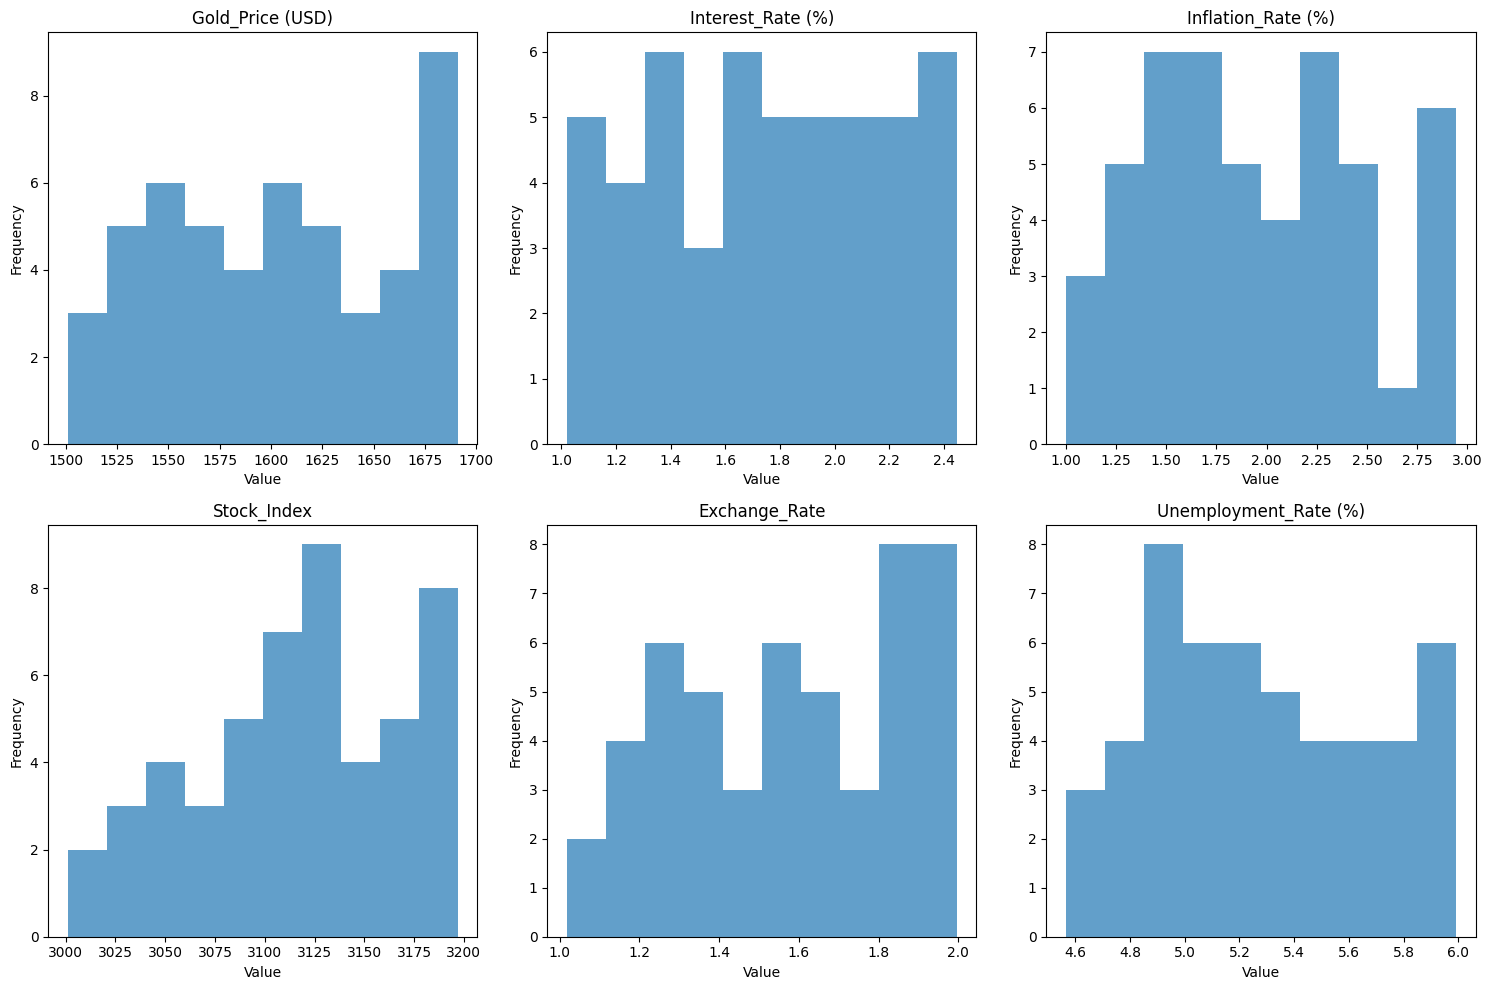

       Gold_Price (USD)  Interest_Rate (%)  Inflation_Rate (%)  Stock_Index  \
count         50.000000          50.000000           50.000000    50.000000   
mean        1603.080000           1.757216            1.941828  3116.040000   
std           58.149996           0.432563            0.530952    51.338397   
min         1501.000000           1.019897            1.001041  3001.000000   
25%         1554.750000           1.420557            1.520169  3081.500000   
50%         1602.000000           1.795395            1.931905  3122.500000   
75%         1655.500000           2.113462            2.336223  3157.000000   
max         1691.000000           2.447883            2.943424  3197.000000   

       Exchange_Rate  Unemployment_Rate (%)  
count      50.000000              50.000000  
mean        1.583342               5.278681  
std         0.285423               0.403624  
min         1.018075               4.565406  
25%         1.331636               4.959432  
50%         

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('gold_price_dataset.csv')

# Univariate Analysis
features = ['Gold_Price (USD)', 'Interest_Rate (%)', 'Inflation_Rate (%)',
            'Stock_Index', 'Exchange_Rate', 'Unemployment_Rate (%)']

# Plot histograms for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    df[feature].plot(kind='hist', bins=10, alpha=0.7)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = df.describe()
print(summary_stats)


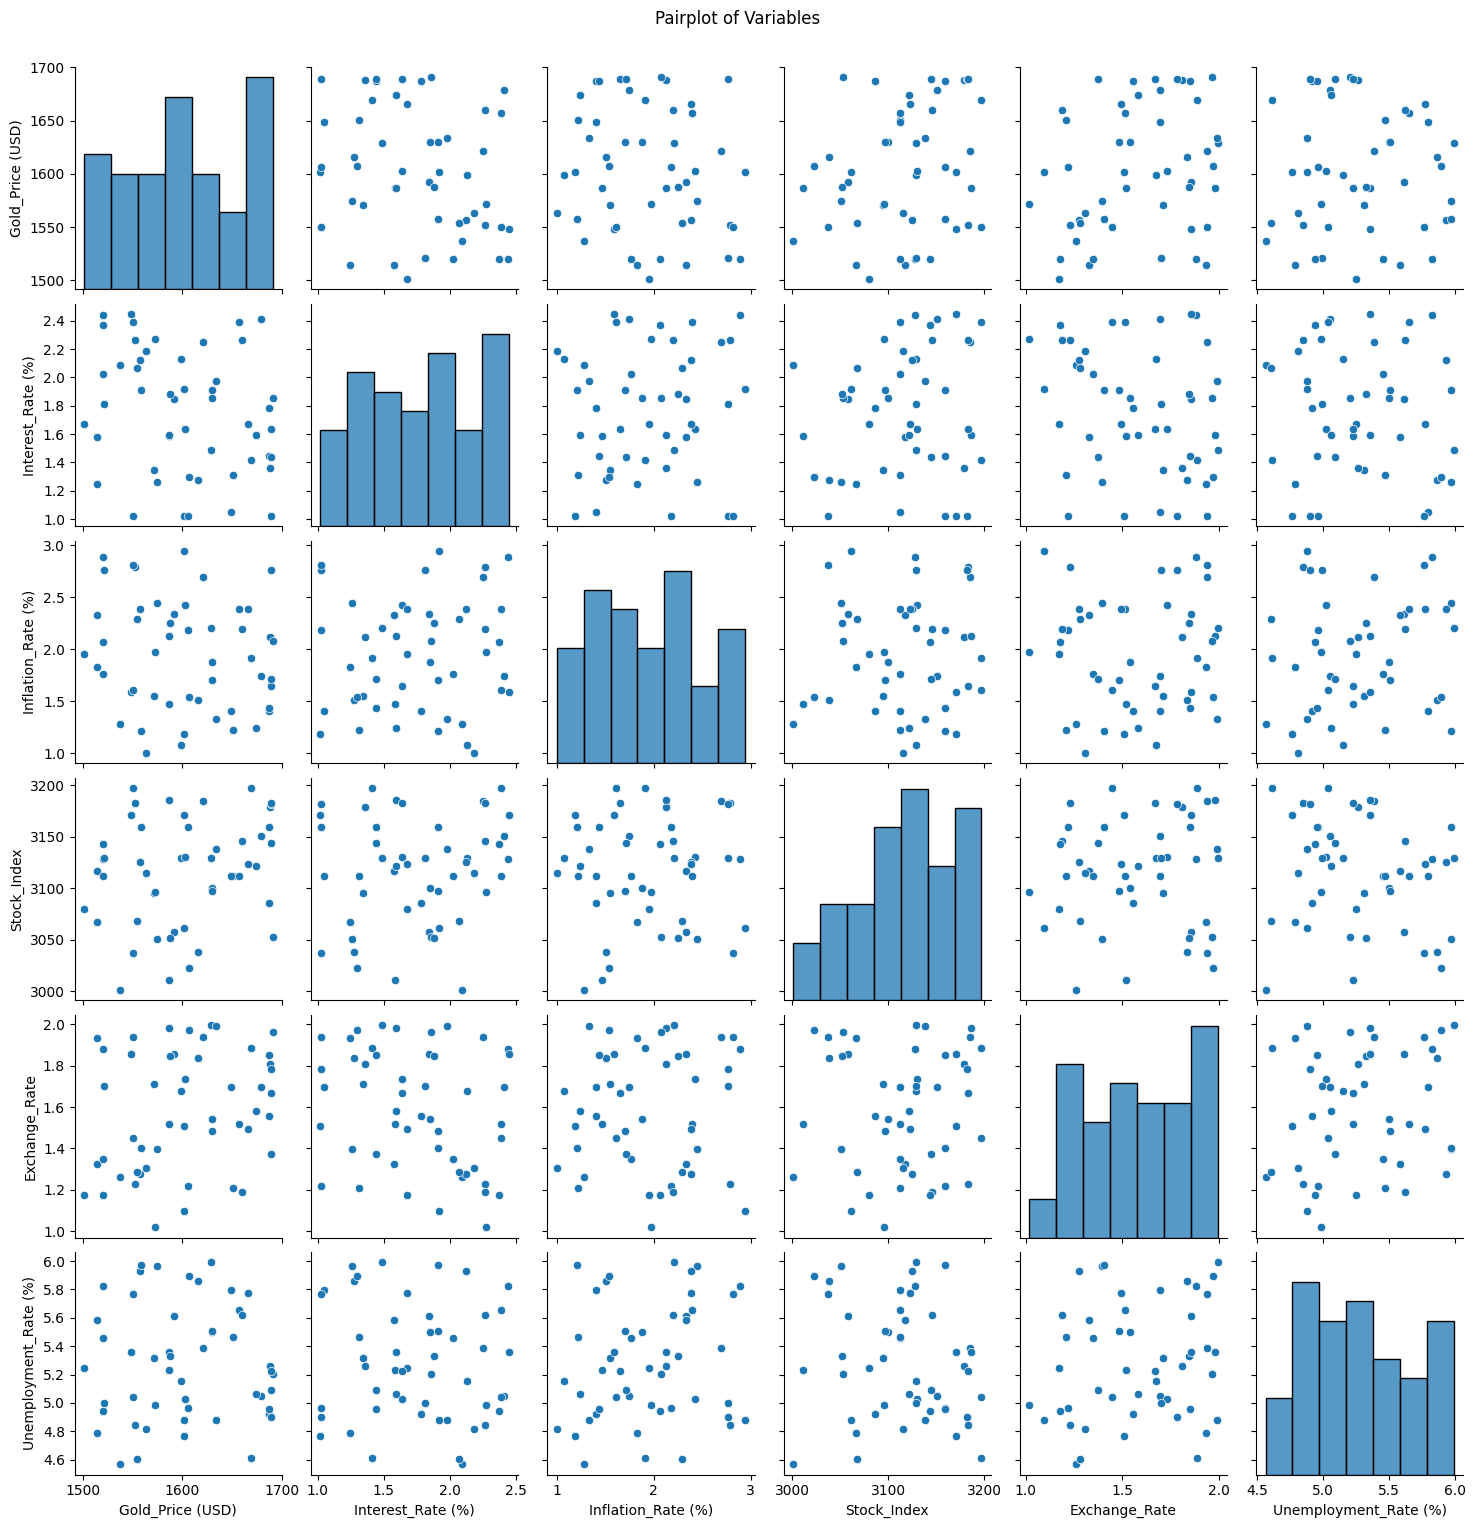

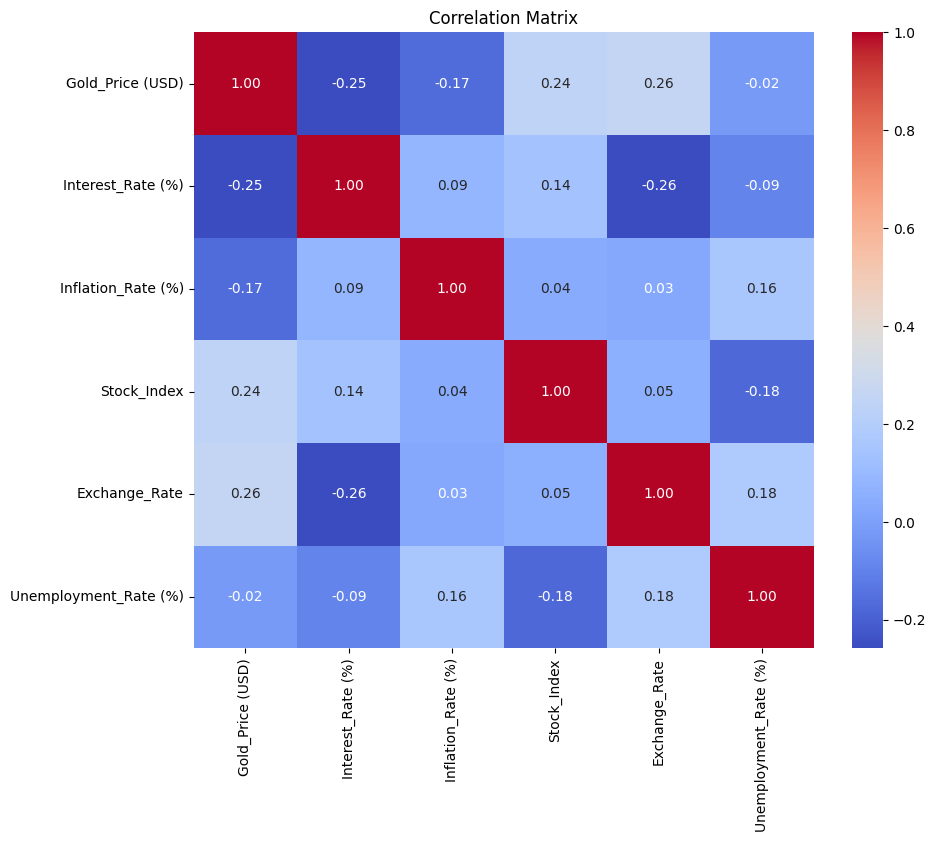

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('gold_price_dataset.csv')

# Drop the 'Date' column
df = df.drop(columns=['Date'])

# Bivariate Analysis
# Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


Training set:
Mean Squared Error: 2463.381367700462
R-squared: 0.21440140999957558

Testing set:
Mean Squared Error: 3979.6783160871246
R-squared: -0.0329287756435237


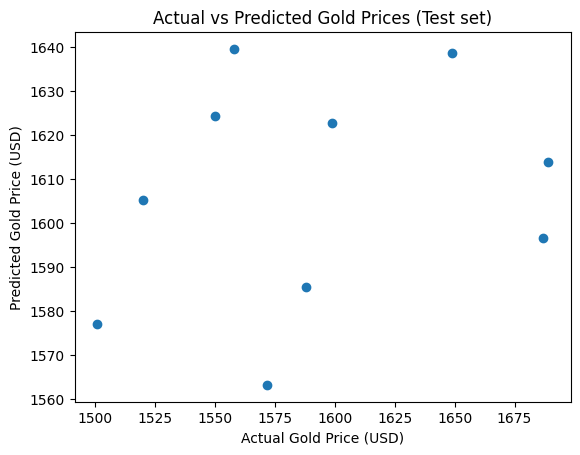

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('gold_price_dataset.csv')

# Prepare the data
X = df.drop(columns=['Date', 'Gold_Price (USD)'])  # Features
y = df['Gold_Price (USD)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
print("Training set:")
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("R-squared:", r2_score(y_train, y_pred_train))
print("\nTesting set:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("R-squared:", r2_score(y_test, y_pred_test))

# Plot predictions vs actual values for the test set
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Gold Price (USD)")
plt.ylabel("Predicted Gold Price (USD)")
plt.title("Actual vs Predicted Gold Prices (Test set)")
plt.show()


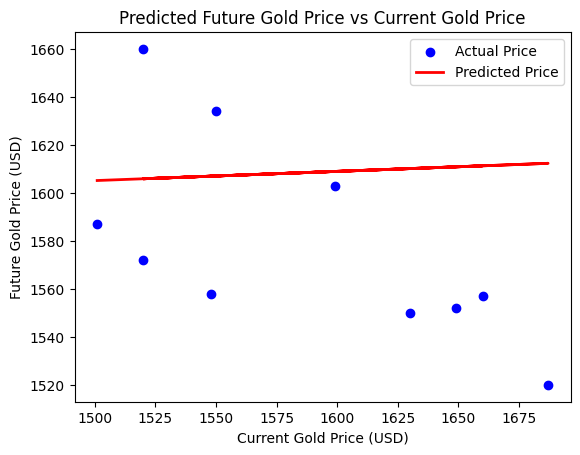

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('gold_price_dataset.csv')

# Prepare the data
X = df[['Gold_Price (USD)']]  # Current price as feature
y = df['Gold_Price (USD)'].shift(-1)  # Future price as target variable, shifted by 1

# Remove last row with NaN in target variable (since we shifted it)
X = X[:-1]
y = y.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plot the actual vs predicted prices for the test set
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Predicted Price')
plt.xlabel('Current Gold Price (USD)')
plt.ylabel('Future Gold Price (USD)')
plt.title('Predicted Future Gold Price vs Current Gold Price')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (Training set):", mse_train)
print("Mean Squared Error (Testing set):", mse_test)


Mean Squared Error (Training set): 3644.740750403659
Mean Squared Error (Testing set): 2612.281812326594


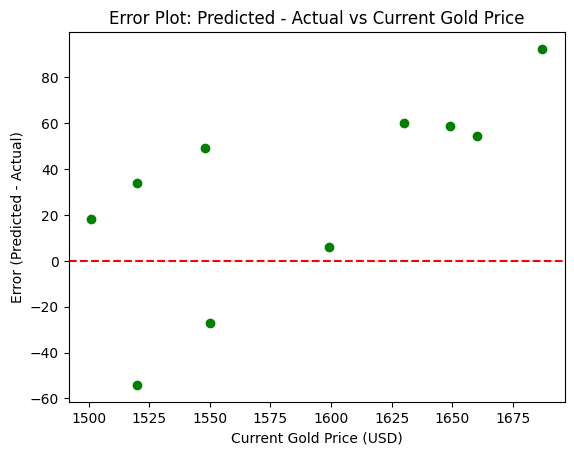

In [8]:
# Calculate the errors
errors_test = y_pred_test - y_test

# Plot the errors
plt.scatter(X_test, errors_test, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Plotting a horizontal line at y=0 for reference
plt.xlabel('Current Gold Price (USD)')
plt.ylabel('Error (Predicted - Actual)')
plt.title('Error Plot: Predicted - Actual vs Current Gold Price')
plt.show()
